### EJEMPLO MANUAL DE CATEGORIZACIÓN  POR ERROR RELATIVO DE KRIGING ORDINARIO DE BLOQUES.

En este notebook se **APLICA** el formulismo de **KRIGING DE BLOQUES**, para exponer un ejemplo de categorización, mediante la metodología denominada **"ERROR RELATIVO DE KRIGING"**. 

1. Se entendera que el ejemplo corresponde a un corte 2D de un bloque de medidas 20 x 20 x 20 metros.
2. Las muestras para trabajar la estimación del bloque, son a nivel puntual y corresponden a un total de tres.
3. La alternativa de kriging en este caso, es la denominada "Ordinario", la que trabaja desconociendo la media global.
4. Se calcula el error relativo de kriging tanto con "semivarianzas" como con "covarianzas" para comparar formulismo.
5. El codigo esta escrito para poder variar la posición de las muestras, sus respectivos valores  y el modelo estructrural. No asi las dimensiones del bloque. 
6. La categorización se realiza mediante el coeficiente de variación de KO con un 95% de nivel de confianza y bajo un supuesto de distribución normal.

*Escrito por H. Hernández G. Curso CRMVK, Nube Minera (2019).*

*Enlace curso:* https://nubeminera.cl/course/categorizacion-de-recursos-por-varianza-de-kriging-en-python-crp/

*Bibliografía:* Oliver, Margaret A. (2015) **Basic Steps in Geostatistics: The Variogram and Kriging**. New York. Springer.

In [2]:
#Requerimientos: 

import pandas as pd #Biblioteca utilizada para el manejo de datos en tablas.
import numpy as np #Biblioteca utilizada para la operación de matemática. 
import matplotlib.pyplot as plt #Biblioteca utilizada para la salida visual de datos.
from matplotlib.patches import Rectangle #Alternativa de Matplotlib para visualizar figuras 2D.

**I. Información del bloque y las muestras:**

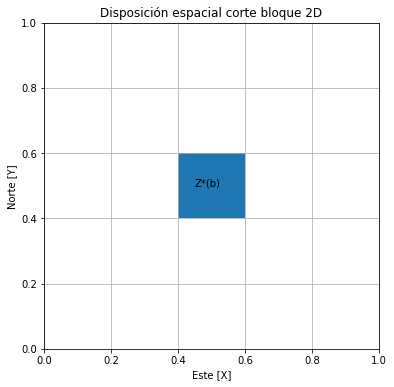

In [8]:
X, Y = 0.4, 0.4 #coordenadas de origen del bloque (corte en 2D).

plt.figure(figsize=(6,6)) #Figura en donde se alojara el bloque y las muestras.
ejeactual = plt.gca()
ejeactual.add_patch(Rectangle((X , Y), 0.2, 0.2, fill=True, alpha=1)) #se proyecta un cuadrado de 0.2 x 0.2 desde X,Y. (*100)

plt.title("Disposición espacial corte bloque 2D")
plt.grid(True) #Generación de una cuadricula en la figura.
plt.text(0.45,0.5, "Z*(b)")
plt.xlabel("Este [X]")
plt.ylabel("Norte [Y]")
plt.show()

In [9]:
m1 = 5 #valor muestra 1
m2 = 7 #valor muestra 2
m3 = 15 #valor muestra 3

#Dataframe para ordenar las muestras.

datos = {'X': [0.5,0.6,0.2,np.nan], 'Y': [0.5,0.4,0.2,np.nan], 'L': [m1,m2,m3,np.nan]}
df = pd.DataFrame(data=datos)
df.rename(index={0:'m1', 1:'m2', 2:'m3', 3:'Z*(b)'}, inplace=True)
#X = Este
#Y = Norte
#L = Valor de la variable
#Z*(b) = Valor medio del bloque, no posee una posición puntual. 
df.head()

,X,Y,L
m1,0.5,0.5,5.0
m2,0.6,0.4,7.0
m3,0.2,0.2,15.0
Z*(b),NaN,NaN,NaN


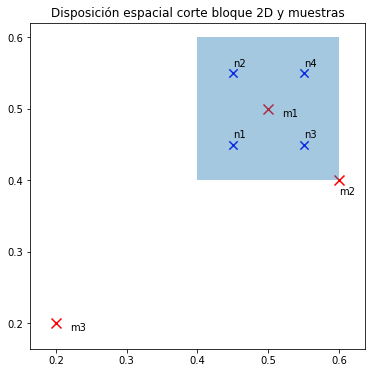

In [12]:
X, Y = 0.4, 0.4 #coordenadas de origen del bloque (corte en 2D)

plt.figure(figsize=(6,6)) #Creamos una figura
ejeactual = plt.gca()
ejeactual.add_patch(Rectangle((X , Y), 0.2, 0.2, fill=True, alpha=0.4)) #se proyecta un cuadrado de 0.2 x 0.2 desde X,Y.

#Muestras puntuales:
ejeactual.scatter(df["X"],df["Y"], marker="x", c="r", s=100) #muestras mi

#Discretización del bloque en 4 nodos:
ejeactual.scatter(0.45,0.45, marker="x", c="b", s=70) #nodo 1
ejeactual.scatter(0.45,0.55, marker="x", c="b", s=70) #nodo 2
ejeactual.scatter(0.55,0.45, marker="x", c="b", s=70) #nodo 3
ejeactual.scatter(0.55,0.55, marker="x", c="b", s=70) #nodo 4

plt.title("Disposición espacial corte bloque 2D y muestras")
plt.text(0.52,0.49, "m1")
plt.text(0.6,0.38, "m2")
plt.text(0.22,0.19, "m3")
plt.text(0.45,0.46, "n1")
plt.text(0.45,0.56, "n2")
plt.text(0.55,0.46, "n3")
plt.text(0.55,0.56, "n4")
plt.grid(False)
plt.show()

**II. Modelo estructural:** G(h) = 0.1 + 0.9 esf(0.8 m)**, y obtención de semivarianzas (punto - punto, punto - volumen).**

In [13]:
#Z*(b) = m1a1 + m2a2 + m3a3 ; *b = bloque; mi = muestras ; ai = pesos de las mi*
# G(h) = 0.1 + 0.9 esf(0.8 m), se entiende como isotropico el modelo.

c0 = 0.1 #efecto pepita
c1 = 0.9 #semivarianza estructura esferica 
ct = c0+c1

a = 0.8 #alcance del semivariograma

#Sistema de Kriging Ordinario Punto - Volumen:

#a1*g1_1 + a2*g1_2 + a3*g1_3 + u = g1_b
#a1*g2_1 + a2*g2_2 + a3*g2_3 + u = g2_b
#a1*g3_1 + a2*g3_2 + a3*g3_3 + u = g3_b
#a1 + a2 + a3  = 1

#Las semivarianzas muestra- muestra (punto - punto), se entenderan como "gi_j".
g1_1 = 0 # por propiedad del semivariograma
m1m2 = np.sqrt((df.iloc[0,0] - df.iloc[1,0])**2 + (df.iloc[0,1] - df.iloc[1,1])**2) 

#iloc señala la posición de fila, columna en el df
g1_2 = (((1.5*m1m2/a) - (0.5*(m1m2/a)**3))*c1)+c0
m1m3 = np.sqrt((df.iloc[0,0] - df.iloc[2,0])**2 + (df.iloc[0,1] - df.iloc[2,1])**2)
g1_3 = (((1.5*m1m3/a) - (0.5*(m1m3/a)**3))*c1)+c0
g2_1 = g1_2
g2_2 = g1_1
m2m3 = np.sqrt((df.iloc[1,0] - df.iloc[2,0])**2 + (df.iloc[1,1] - df.iloc[2,1])**2)
g2_3 = (((1.5*m2m3/a) - (0.5*(m2m3/a)**3))*c1)+c0
g3_1 = g1_3
g3_2 = g2_3
g3_3 = g1_1

**III. Estimación Z*(b) para el bloque (corte 2D) discretizado en 4 nodos:**

In [7]:
nodos = {'X': [0.45,0.45,0.55,0.55], 'Y': [0.45,0.55,0.45,0.55]}
dfn = pd.DataFrame(data=nodos)
dfn.rename(index={0:'n1', 1:'n2', 2:'n3', 3:'n4'}, inplace=True)
dfn.head()

,X,Y
n1,0.45,0.45
n2,0.45,0.55
n3,0.55,0.45
n4,0.55,0.55


In [15]:
# distancias mi a ni:

# 0.45,0.45 nodo 1
# 0.45,0.55 nodo 2
# 0.55,0.45 nodo 3
# 0.55,0.55 nodo 4

# 0.5,0.5 muestra 1
# 0.6,0.4 muestra 2
# 0.2,0.2 muestra 3

nodos = {'X': [0.45,0.45,0.55,0.55], 'Y': [0.45,0.55,0.45,0.55]}
dfn = pd.DataFrame(data=nodos)
dfn.rename(index={0:'n1', 1:'n2', 2:'n3', 3:'n4'}, inplace=True)

m1n1 = np.sqrt((df.iloc[0,0] - dfn.iloc[0,0])**2 + (df.iloc[0,1] - dfn.iloc[0,1])**2)
m1n2 = np.sqrt((df.iloc[0,0] - dfn.iloc[1,0])**2 + (df.iloc[0,1] - dfn.iloc[1,1])**2)
m1n3 = np.sqrt((df.iloc[0,0] - dfn.iloc[2,0])**2 + (df.iloc[0,1] - dfn.iloc[2,1])**2)
m1n4 = np.sqrt((df.iloc[0,0] - dfn.iloc[3,0])**2 + (df.iloc[0,1] - dfn.iloc[3,1])**2)

m2n1 = np.sqrt((df.iloc[1,0] - dfn.iloc[0,0])**2 + (df.iloc[1,1] - dfn.iloc[0,1])**2)
m2n2 = np.sqrt((df.iloc[1,0] - dfn.iloc[1,0])**2 + (df.iloc[1,1] - dfn.iloc[1,1])**2)
m2n3 = np.sqrt((df.iloc[1,0] - dfn.iloc[2,0])**2 + (df.iloc[1,1] - dfn.iloc[2,1])**2)
m2n4 = np.sqrt((df.iloc[1,0] - dfn.iloc[3,0])**2 + (df.iloc[1,1] - dfn.iloc[3,1])**2)

m3n1 = np.sqrt((df.iloc[2,0] - dfn.iloc[0,0])**2 + (df.iloc[2,1] - dfn.iloc[0,1])**2)
m3n2 = np.sqrt((df.iloc[2,0] - dfn.iloc[1,0])**2 + (df.iloc[2,1] - dfn.iloc[1,1])**2)
m3n3 = np.sqrt((df.iloc[2,0] - dfn.iloc[2,0])**2 + (df.iloc[2,1] - dfn.iloc[2,1])**2)
m3n4 = np.sqrt((df.iloc[2,0] - dfn.iloc[3,0])**2 + (df.iloc[2,1] - dfn.iloc[3,1])**2)

# Semivarianza mi a ni:

gm1n1 = (((1.5*m1n1/a) - (0.5*(m1n1/a)**3))*c1)+c0
gm1n2 = (((1.5*m1n2/a) - (0.5*(m1n2/a)**3))*c1)+c0
gm1n3 = (((1.5*m1n3/a) - (0.5*(m1n3/a)**3))*c1)+c0
gm1n4 = (((1.5*m1n4/a) - (0.5*(m1n4/a)**3))*c1)+c0

gm2n1 = (((1.5*m2n1/a) - (0.5*(m2n1/a)**3))*c1)+c0
gm2n2 = (((1.5*m2n2/a) - (0.5*(m2n2/a)**3))*c1)+c0
gm2n3 = (((1.5*m2n3/a) - (0.5*(m2n3/a)**3))*c1)+c0
gm2n4 = (((1.5*m2n4/a) - (0.5*(m2n4/a)**3))*c1)+c0

gm3n1 = (((1.5*m3n1/a) - (0.5*(m3n1/a)**3))*c1)+c0
gm3n2 = (((1.5*m3n2/a) - (0.5*(m3n2/a)**3))*c1)+c0
gm3n3 = (((1.5*m3n3/a) - (0.5*(m3n3/a)**3))*c1)+c0
gm3n4 = (((1.5*m3n4/a) - (0.5*(m3n4/a)**3))*c1)+c0

# Semivarianza punto - volumen; mi - b
# sum(G(mi,ni))/n    donde "n" es el numero de nodos

n= 4

g1_b = (gm1n1+gm1n2+gm1n3+gm1n4)/n 
g2_b = (gm2n1 + gm2n2 + gm2n3 + gm2n4)/n
g3_b = (gm3n1+ gm3n2+ gm3n3 + gm3n4)/n

#Solución del sistema de Kriging Ordinario (punto - volumen):

ma =np.array([[g1_1, g1_2, g1_3, 1],[g2_1, g2_2, g2_3, 1], [g3_1, g3_2, g3_3, 1],[1, 1, 1, 0]])
mb = np.array([[g1_b],[g2_b], [g3_b], [1]])

msx = np.linalg.solve(ma,mb)
ms = pd.DataFrame(msx)
a1 = ms.iloc[0,0]
a2 = ms.iloc[1,0]
a3 = ms.iloc[2,0]
u = ms.iloc[3,0]
insesgo = a1+a2+a3

print("Condición de insesgo lineal:",round(insesgo,2))

Condición de insesgo lineal: 1.0


In [9]:
Zb = a1*m1 + a2*m2 + a3*m3
print("La media estimada del bloque es:", round(Zb,2))

La media estimada del bloque es: 6.44


**IV: Varianza de estimación de Kriging:** Matriz G(h).

In [10]:
#Se calculara la varianza denominada "volumen - volumen", en este caso 16 valores resultantes de n^2.

#distancias entre nodos:

n1n1 = 0 #por obviedad. 
n1n2 = np.sqrt((dfn.iloc[0,0] - dfn.iloc[1,0])**2 + (dfn.iloc[0,1] - dfn.iloc[1,1])**2)
n1n3 = np.sqrt((dfn.iloc[0,0] - dfn.iloc[2,0])**2 + (dfn.iloc[0,1] - dfn.iloc[2,1])**2)
n1n4 = np.sqrt((dfn.iloc[0,0] - dfn.iloc[3,0])**2 + (dfn.iloc[0,1] - dfn.iloc[3,1])**2)

n2n1 = n1n2
n2n2 = n1n1
n2n3 = np.sqrt((dfn.iloc[1,0] - dfn.iloc[2,0])**2 + (dfn.iloc[1,1] - dfn.iloc[2,1])**2)
n2n4 = np.sqrt((dfn.iloc[1,0] - dfn.iloc[3,0])**2 + (dfn.iloc[1,1] - dfn.iloc[3,1])**2)

n3n1 = n1n3
n3n2 = n2n3
n3n3 = n1n1
n3n4 = np.sqrt((dfn.iloc[2,0] - dfn.iloc[3,0])**2 + (dfn.iloc[2,1] - dfn.iloc[3,1])**2)

n4n1 = n1n4
n4n2 = n2n4
n4n3 = n3n4
n4n4 = n1n1

#semivarianzas entre nodos:

g_n1n1 = 0 #por propiedad.
g_n1n2 = (((1.5*n1n2/a) - (0.5*(n1n2/a)**3))*c1)+c0
g_n1n3 = (((1.5*n1n3/a) - (0.5*(n1n3/a)**3))*c1)+c0
g_n1n4 = (((1.5*n1n4/a) - (0.5*(n1n4/a)**3))*c1)+c0

g_n2n1 = g_n1n2
g_n2n2 = g_n1n1
g_n2n3 = (((1.5*n2n3/a) - (0.5*(n2n3/a)**3))*c1)+c0
g_n2n4 = (((1.5*n2n4/a) - (0.5*(n2n4/a)**3))*c1)+c0

g_n3n1 = g_n1n3
g_n3n2 = g_n2n3
g_n3n3 = g_n1n1
g_n3n4 = (((1.5*n3n4/a) - (0.5*(n3n4/a)**3))*c1)+c0

g_n4n1 = g_n1n4
g_n4n2 = g_n2n4
g_n4n3 = g_n3n4
g_n4n4 = g_n1n1


gv_v = ((g_n1n1+g_n1n2+g_n1n3+g_n1n4+g_n2n1+g_n2n2+g_n2n3+g_n2n4+g_n3n1+g_n3n2+g_n3n3+g_n3n4+g_n4n1+g_n4n2+g_n4n3+g_n4n4)/(n**2))

var_g = (a1*g1_b + a2*g2_b + a3*g3_b) + u - gv_v
print("La varianza de estimación de K.O. es:",round(var_g,2))

La varianza de estimación de K.O. es: 0.15


In [11]:
# Mediante el uso de un sistema de Kriging con covarianzas, el resultado es el mismo:

cov_1 = ct - g1_b # covarianza entre m1 y el bloque
cov_2 = ct - g2_b # covarianza entre m2 y el bloque
cov_3 = ct - g3_b # covarianza entre m3 y el bloque

var_c = ((ct - gv_v) - ((a1*cov_1 + a2*cov_2 + a3*cov_3) - u)) #Covarianza bloque-bloque, menos ponderadores*covarianza muestra-bloque menos mult. lagrange
print("La covarianza de estimación de K.O. es:",round(var_c,2))

La covarianza de estimación de K.O. es: 0.15


**Categorización del bloque:**

* Se categoriza mediante el coefiente de variación a un nivel del 95%.

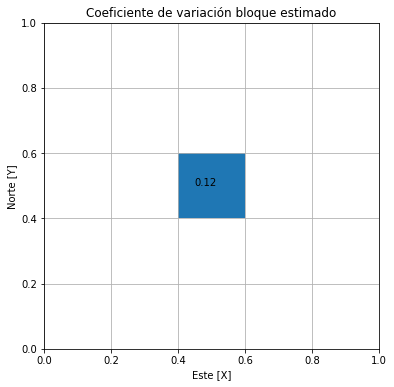

CV: 0.12 equivalente a un bloque medido con un 95% de confianza


In [13]:
plt.figure(figsize=(6,6))
ejeactual = plt.gca()
ejeactual.add_patch(Rectangle((X , Y), 0.2, 0.2, fill=True, alpha=1)) #se proyecta un cuadrado de 0.2 x 0.2 desde X,Y. (*100)

cv = (np.sqrt(var_g))*1.96/Zb

plt.title("Coeficiente de variación bloque estimado")
plt.grid(True) #Generación de una cuadricula en la figura.
plt.text(0.45,0.5, round(cv,2))
plt.xlabel("Este [X]")
plt.ylabel("Norte [Y]")
plt.show()

if cv > 0.5:
    print("CV:", round(cv,2), "equivalente a un bloque inferido con un 95% de confianza")
elif cv < 0.25:
    print("CV:", round(cv,2),"equivalente a un bloque medido con un 95% de confianza")
else:
    print("CV:", round(cv,2),"equivalente a un bloque indicado con un 95% de confianza")